In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# upload kaggle pi token

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 99% 226M/228M [00:06<00:00, 75.4MB/s]
100% 228M/228M [00:06<00:00, 38.0MB/s]


In [ ]:
!unzip /content/the-movies-dataset.zip

Archive:  /content/the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
!unzip /content/gdrive/the-movies-dataset.zip

unzip:  cannot find or open /content/gdrive/the-movies-dataset.zip, /content/gdrive/the-movies-dataset.zip.zip or /content/gdrive/the-movies-dataset.zip.ZIP.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

style.use('seaborn-poster')
style.use('ggplot')

In [ ]:
data=pd.read_csv('movies_metadata.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
#As now we will selectively take out the important columns such as original_title,overview,id,genres

#As now we will selectively take out the
#important columns such as original_title,overview,id,genres


In [ ]:
filtered_data = data.filter(['original_title','overview', 'id', 'genres'], axis=1)
len(filtered_data)

45466

In [ ]:
filtered_data.head()

,original_title,overview,id,genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]"


In [ ]:
filtered_data['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [ ]:
genres = filtered_data['genres'].tolist()

Removing Some genre which are present only once in entire dataset

and some other genre which are not recognised by posters

In [ ]:
invalid_genres = ['Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands',
                  'Mardock Scramble Production Committee', 'Odyssey Media',
                  'Pulser Productions', 'Rogue State', 'Sentai Filmworks',
                  'Telescene Film Group Productions', 'The Cartel', 'Vision View Entertainment', 
                  'TV Movie', 'Foreign']

In [ ]:
genre_per_movie=[]
genre_dict={}

for genre in genres:
  genre=ast.literal_eval(genre)
  genre_list=[]
  for val in genre:
    if val['name'] not in invalid_genres:
      genre_list.append(val['name'])
      if val['name'] in genre_dict:
        genre_dict[val['name']]+=1
      else:
        genre_dict[val['name']]=1
  genre_per_movie.append(genre_list)



Filtered out all genre of movies taking only valid entries i.e.. genre having count more than 1

In [ ]:
genre_dict={key:val for key,val in genre_dict.items() if val!=1}
genre_dict

{'Action': 6596,
 'Adventure': 3496,
 'Animation': 1935,
 'Comedy': 13182,
 'Crime': 4307,
 'Documentary': 3932,
 'Drama': 20265,
 'Family': 2770,
 'Fantasy': 2313,
 'History': 1398,
 'Horror': 4673,
 'Music': 1598,
 'Mystery': 2467,
 'Romance': 6735,
 'Science Fiction': 3049,
 'Thriller': 7624,
 'War': 1323,
 'Western': 1042}

In [ ]:
len(genre_per_movie)   # total no of entries

45466

In [ ]:
keys = list(genre_dict.keys())
values = list(genre_dict.values())

Lets see distribution of all genre

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

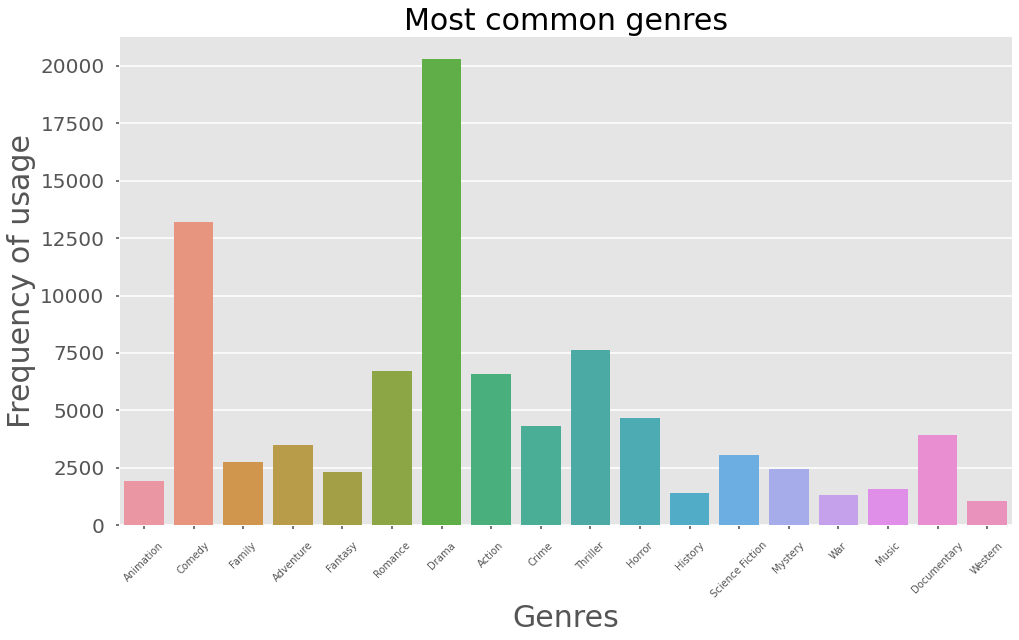

In [ ]:
plt.figure(figsize=(16, 9))
sns.barplot(keys, values)
plt.title("Most common genres", size=30)
plt.ylabel('Frequency of usage', size=30)
plt.xlabel('Genres', size=30)
plt.xticks(size=10)
plt.xticks(rotation=45)
plt.yticks(size=20)

Adding all corresponding genre

In [ ]:
filtered_data['genre_list']=genre_per_movie
filtered_data.head()

,original_title,overview,id,genres,genre_list
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]


Cleaning of data

removing all entries which missing genre

In [ ]:
filtered_data=filtered_data[filtered_data['genre_list'].map(lambda x:len(x))>0]

In [ ]:
len(filtered_data)

42995

In [ ]:
from bs4 import BeautifulSoup
import requests
import os

In [ ]:

!pip install tmdbv3api


In [ ]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
tmdb = TMDb()
tmdb.api_key = '24571c54b55b2cf2c77c8ebe3bfaf50e'

In [ ]:
def get_posters(url, name):
  try:
    baseurl = 'http://image.tmdb.org/t/p/w185'
    link = baseurl + url
    img = requests.get(link).content
    name = name.replace('/', '_')
    file_name = str(name) + ".jpg"
    path = os.path.join('/content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters', file_name)
    with open(path, 'wb') as handler:
      handler.write(img)
    return path
  except Exception as e:
    print('[ERROR]', str(e))
    return "Error"

In [ ]:
poster_paths = []
movie = Movie()

i = 1
for id, name in zip(filtered_data['id'].tolist(), filtered_data['original_title'].tolist()):
  m = movie.details(int(id))
  if i%100==0:
    print("Downloading ",i, name )
  #print('Downloading:', name, "i", i)
  try:
    poster_paths.append(get_posters(m.poster_path, name))
  except Exception as e:
    print('[ERROR]', str(e))
    poster_paths.append("API Error")
  i += 1
  # temp = name.replace('/', '_')
  # file_name = str(temp) + ".jpg"
  # path = os.path.join('/content/drive/My Drive/Movie_genre_prediction_dataset/downloaded_posters', file_name)
  # if '/' in name:
  #   print(name)
  #   print("Path:", path)

print(len(poster_paths))

[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must be str, not NoneType
[ERROR] must b

In [ ]:
filtered_data['poster_paths'] = poster_paths
filtered_data.head()

,original_title,overview,id,genres,genre_list,poster_paths
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",/content/gdrive/My Drive/Movie_genre_predictio...
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",/content/gdrive/My Drive/Movie_genre_predictio...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",/content/gdrive/My Drive/Movie_genre_predictio...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",/content/gdrive/My Drive/Movie_genre_predictio...
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/content/gdrive/My Drive/Movie_genre_predictio...


In [ ]:
print(len(filtered_data))
print(len(filtered_data[(filtered_data['poster_paths'] == "API Error") | (filtered_data['poster_paths'] == "Error")]))

42995
4057


In [ ]:
filtered_data = filtered_data[filtered_data['poster_paths'] != "API Error"]
print(len(filtered_data))

42681


In [ ]:
filtered_data = filtered_data[filtered_data['poster_paths'] != "Error"]
print(len(filtered_data))

38938


In [ ]:
filtered_data.head()

,original_title,overview,id,genres,genre_list,poster_paths
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",/content/gdrive/My Drive/Movie_genre_predictio...
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",/content/gdrive/My Drive/Movie_genre_predictio...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",/content/gdrive/My Drive/Movie_genre_predictio...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",/content/gdrive/My Drive/Movie_genre_predictio...
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/content/gdrive/My Drive/Movie_genre_predictio...


In [ ]:
filtered_data.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/dataset_mod.csv")

In [ ]:

filtered_data = pd.read_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/dataset_mod.csv")

In [ ]:
filtered_data.head()

,Unnamed: 0,original_title,overview,id,genres,genre_list,poster_paths
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","['Animation', 'Comedy', 'Family']",/content/gdrive/My Drive/Movie_genre_predictio...
1,1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","['Adventure', 'Fantasy', 'Family']",/content/gdrive/My Drive/Movie_genre_predictio...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","['Romance', 'Comedy']",/content/gdrive/My Drive/Movie_genre_predictio...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","['Comedy', 'Drama', 'Romance']",/content/gdrive/My Drive/Movie_genre_predictio...
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/content/gdrive/My Drive/Movie_genre_predictio...


In [ ]:
filtered_data['poster_paths'][0]

'/content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Toy Story.jpg'

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(filtered_data, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
print(type(train), type(test), type(val))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
val.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/val_data.csv")
test.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/test_data.csv")
train.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/train_data.csv")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
import cv2

In [ ]:
def resize_img(path):
  try:
    img=cv2.imread(path)
    img=cv2.resize(img,(75,115))
    img=img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

In [ ]:
val_imgs = []
i = 0
for index, row in val.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    val_imgs.append(img)
  else:
    val = val.drop(index)
    print("Dropping row:", index, "Length:", len(val))
  i += 1

Processing i: 0 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Rudolph the Red-Nosed Reindeer.jpg
Processing i: 100 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Le beau mariage.jpg
Processing i: 200 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Transpecos.jpg
Processing i: 300 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/History of the World: Part I.jpg
Processing i: 400 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/The Smiling Ghost.jpg
Processing i: 500 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Simon.jpg
Processing i: 600 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/The Big Hit.jpg
Processing i: 700 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Surviving the Game.jpg
Processing i: 800 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded

In [ ]:
assert len(val) == len(val_imgs)

In [ ]:
val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

(3115, 115, 75, 3)

In [ ]:
val.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/val_data.csv")


In [ ]:
import pickle
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/val_np_img_norm','wb') as f: pickle.dump(val_np_imgs, f)

In [ ]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

Processing i: 0 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Hansel and Gretel Get Baked.jpg
Processing i: 100 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Lille Fridolf Och Jag.jpg
Processing i: 200 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Hacker.jpg
Processing i: 300 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Teenage Cocktail.jpg
Processing i: 400 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Agente 077 missione Bloody Mary.jpg
Processing i: 500 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Homecoming.jpg
Processing i: 600 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Demony wojny według Goi.jpg
Processing i: 700 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Personal Best.jpg
Processing i: 800 /content/gdrive/My Drive/Movie_genre_prediction_datas

In [ ]:
assert len(test) == len(test_imgs)

In [ ]:
test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

(7787, 115, 75, 3)

In [ ]:
test.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/test_data.csv")

In [ ]:
import pickle
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/test_np_imgs_norm','wb') as f: pickle.dump(test_np_imgs, f)

In [ ]:
train_imgs = []
i = 0
for index, row in train.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    train_imgs.append(img)
  else:
    train = train.drop(index)
    print("Dropping row:", index, "Length:", len(train))
  i += 1

Processing i: 0 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Remarkable Power.jpg
Processing i: 100 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Convenience.jpg
Processing i: 200 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Maschi Contro Femmine.jpg
Processing i: 300 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/George of the Jungle 2.jpg
Processing i: 400 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Stars & Bars.jpg
Processing i: 500 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/The Incident.jpg
Processing i: 600 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Virginia.jpg
Processing i: 700 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Ballermann 6.jpg
Processing i: 800 /content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Aus dem Leb

In [ ]:
assert len(train) == len(train_imgs)

In [ ]:

train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

(28035, 115, 75, 3)

In [ ]:
train_np_imgs.shape

(28035, 115, 75, 3)

In [ ]:
train.to_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/train_data.csv")

In [ ]:

import pickle
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/train_np_imgs_norm','wb') as f: pickle.dump(train_np_imgs, f)